### KNN

### Import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

### Import Iris Dataset

In [43]:
iris = datasets.load_iris()
X,y = iris.data, iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1234)

### Visualize Iris Dataset

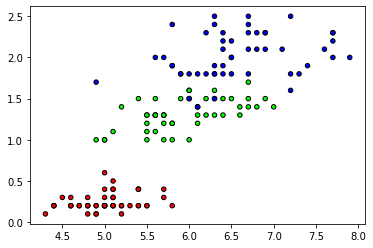

In [8]:
plt.figure()
plt.scatter(X[:,0],X[:,3],c=y,cmap = cmap,edgecolor='k',s=20)
plt.show()

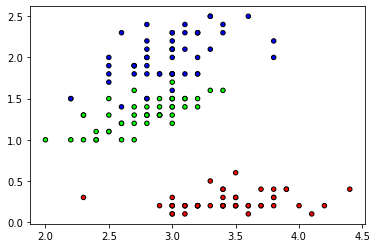

In [9]:
plt.figure()
plt.scatter(X[:,1],X[:,3],c=y,cmap = cmap,edgecolor='k',s=20)
plt.show()

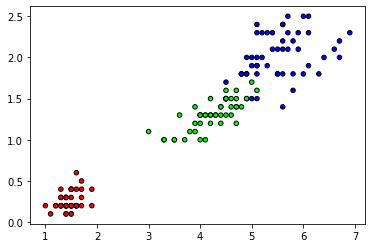

In [10]:
plt.figure()
plt.scatter(X[:,2],X[:,3],c=y,cmap = cmap,edgecolor='k',s=20)
plt.show()

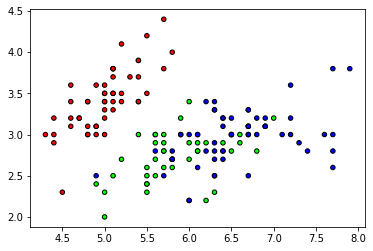

In [11]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,cmap = cmap,edgecolor='k',s=20)
plt.show()

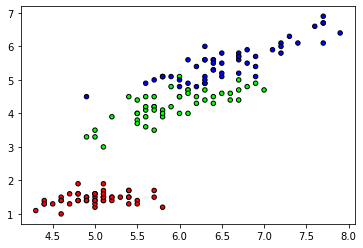

In [12]:
plt.figure()
plt.scatter(X[:,0],X[:,2],c=y,cmap = cmap,edgecolor='k',s=20)
plt.show()

In [99]:
class KNN:
    def __init__(self,k=3):
        self.k = k
        self.df = pd.DataFrame(columns=['Distance','Feature'])
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
        self.dict = {key:0 for key in np.unique(y)}
    def predict(self,X):
        self.y = X[:,0]
        for j in range(0,X.shape[0]):
            for i in range(0,self.X_train.shape[0]):
                distance = np.linalg.norm(self.X_train[i] -X[j] )
                feature = self.y_train[i]
                self.df.loc[len(self.df)] = [distance,feature]
            self.df.sort_values(by = ['Distance'],inplace = True)
            self.k_reached = False
            while not self.k_reached:
                for cat in self.df['Feature']:
                    
                    self.dict[cat] = self.dict[cat]+1
                    if self.dict[cat] == self.k:
                        self.k_reached = True
                        self.y[j] = cat
                        self.dict = {key:0 for key in np.unique(self.y_train)}
                        del(self.df)
                        self.df = pd.DataFrame(columns=['Distance','Feature'])
                        break
                    
        return self.y
        
            
    
        

### Perform prediction using my own KNN

In [100]:
my_KNN = KNN()
my_KNN.fit(X_train,y_train)
my_y_predictions = my_KNN.predict(X_test)

### Perform predictions using the Python library KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [110]:
y_pred-my_y_predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])